In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams['font.family'] = 'P052'
plt.rcParams['font.serif'] = ['Times New Roman']

def plot_loss_and_deleted_tokens(layers, loss, runtimes, filename):
    fig, ax1 = plt.subplots(figsize=(4, 3))

    # Plot the loss on the left y-axis
    ax1.set_xlabel('Layer of Delete Gate', size=12)
    ax1.set_ylabel('Bits-per-byte (BPB)', color='tab:blue', size=12)
    ax1.plot(layers, loss, color='tab:blue', marker='o', label='Loss')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    plt.grid(linestyle='--', alpha=0.2, color='tab:blue')

    # Create another y-axis to plot the deleted tokens
    ax2 = ax1.twinx()
    ax2.set_ylabel('Average Runtime (ms)', color='tab:orange', size=12)
    ax2.plot(layers, runtimes, color='tab:orange', marker='x', label='Deleted Tokens')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    # Title and layout adjustments
    fig.tight_layout()

    # Show the plot
    plt.grid(linestyle='--', alpha=0.2, color='tab:orange')
    plt.savefig(f"figures/{filename}.pdf")
    plt.show()


In [8]:
BASE_PATH = "eval_results/span_corruption_multilingual/MrT5/{}.csv"

# Convert cross entropy loss to bits per byte
log2_e = np.log2(np.e)

def get_column_values(file_paths, column_name):
    values = []
    for file_path in file_paths:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(BASE_PATH.format(file_path))

        # Set the sample size for each language
        df["Sample Size"] = 10000  # Default sample size
        df.loc[df["Language"] == "Swahili", "Sample Size"] = 2816
        df.loc[df["Language"] == "Urdu", "Sample Size"] = 9328

        # Compute the weighted average of the specified column
        df["Weighted Value"] = df[column_name] * df["Sample Size"]
        weighted_avg = df["Weighted Value"].sum() / df["Sample Size"].sum()

        if 'Cross Entropy Loss' in column_name:
            weighted_avg *= log2_e

        values.append(weighted_avg)
    return values

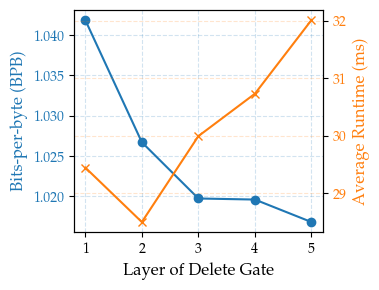

In [9]:
file_paths = [
    'mrt5_span_corruption_multilingual_pi-cntrl50%_L1_seed968',
    'mrt5_span_corruption_multilingual_pi-cntrl50%_L2_seed452',
    'mrt5_span_corruption_multilingual_pi-cntrl50%_seed40',
    'mrt5_span_corruption_multilingual_pi-cntrl50%_L4_seed2',
    'mrt5_span_corruption_multilingual_pi-cntrl50%_L5_seed22',
]
losses = get_column_values(file_paths, 'Eval Cross Entropy Loss')
runtimes = get_column_values(file_paths, 'Eval Runtime')
layers = [str(i) for i in range(1, 6)]

plot_loss_and_deleted_tokens(layers, losses, runtimes, "gate_placement_analysis_pctrl50")